In [1]:
%pwd

'/home/david/Documents/repos/loan_default/notebooks'

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
df_train = pd.read_csv('../data/train.csv')

In [4]:
df_train.head()

LoanNr_ChkDgt                            Name  \
0     8665963006  CERTIFIED TRANSMISSION & DRIVE   
1     2123995005  ALA ENTERPRISES, INC. DBA NICK   
2     8952424007               MARGISON GRAPHICS   
3     2322574004       GOLF AMERICA OF EAGAN INC   
4     5164994009     SOFIA AUTOMOTIVE CENTER INC   

                                             Sector        City State    Zip  \
0     Other services (except public administration)      LINDON    UT  84042   
1                   Accommodation and food services    VALENCIA    CA  91381   
2  Professional, scientific, and technical services  NEW CASTLE    IN  47362   
3                                      Retail trade       EAGAN    MN  55122   
4     Other services (except public administration)   ROCHESTER    NY  14609   

                          Bank BankState   NAICS  ApprovalFY  NoEmp  NewExist  \
0    ZIONS FIRST NATIONAL BANK        UT  811113        1995      4       1.0   
1       CAPITAL ONE NATL ASSOC        VA  722110        2007     15       2.0   
2          STAR FINANCIAL BANK        IN  541430        2005      4       1.0   
3  WELLS FARGO BANK NATL ASSOC        SD  451110        1998     26       1.0   
4   BANK OF AMERICA NATL ASSOC        NC  811121        2002     20       1.0   

   CreateJob  RetainedJob  FranchiseCode  UrbanRural  DisbursementGross  \
0          0            0              1           0           274000.0   
1          0           15              0           1            50000.0   
2          0            0              1           1           105295.0   
3          6            0              1           0            80000.0   
4          0           20              1           1            50000.0   

     GrAppv  SBA_Appv  default_amount  
0  274000.0  191800.0             0.0  
1   50000.0   25000.0         45803.0  
2  110000.0   93500.0             0.0  
3   80000.0   64000.0             0.0  
4   50000.0   25000.0             0.0

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83656 entries, 0 to 83655
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanNr_ChkDgt      83656 non-null  int64  
 1   Name               83656 non-null  object 
 2   Sector             83656 non-null  object 
 3   City               83656 non-null  object 
 4   State              83656 non-null  object 
 5   Zip                83656 non-null  int64  
 6   Bank               83656 non-null  object 
 7   BankState          83656 non-null  object 
 8   NAICS              83656 non-null  int64  
 9   ApprovalFY         83656 non-null  int64  
 10  NoEmp              83656 non-null  int64  
 11  NewExist           83640 non-null  float64
 12  CreateJob          83656 non-null  int64  
 13  RetainedJob        83656 non-null  int64  
 14  FranchiseCode      83656 non-null  int64  
 15  UrbanRural         83656 non-null  int64  
 16  DisbursementGross  836

In [6]:
df_train['Sector'].value_counts()

Retail trade                                                                15406
Other services (except public administration)                                8924
Professional, scientific, and technical services                             8679
Construction                                                                 8034
Accommodation and food services                                              7743
Manufacturing                                                                7704
Health care and social assistance                                            6628
Wholesale trade                                                              5807
Administrative and support and waste management and remediation services     4007
Transportation and warehousing                                               2664
Real estate and rental and leasing                                           1706
Arts, entertainment, and recreation                                          1680
Information     

In [7]:
df_train['State'].value_counts()

CA    13496
TX     6439
NY     5963
FL     4442
PA     3870
OH     3125
IL     2820
NJ     2642
MA     2535
WA     2293
MI     2017
GA     1989
AZ     1984
CO     1949
UT     1880
MN     1667
WI     1451
MO     1434
NC     1422
MD     1388
IN     1337
CT     1293
VA     1250
NH     1130
OR     1103
RI      965
ID      894
TN      826
NV      803
LA      741
MS      698
AL      590
MT      587
KY      573
KS      549
OK      527
SC      522
IA      489
NE      484
NM      474
VT      429
ME      421
AR      421
HI      359
WV      245
DE      217
ND      214
AK      199
DC      181
SD      180
WY      149
Name: State, dtype: int64

In [8]:
df_train.groupby('State').mean().sort_values(by='default_amount', ascending=False)

LoanNr_ChkDgt           Zip          NAICS   ApprovalFY      NoEmp  \
State                                                                       
FL      4.210163e+09  33297.609860  524469.466006  2003.931562   7.264746   
GA      4.336526e+09  30487.098039  543849.142785  2003.058824   6.624937   
AZ      4.607667e+09  85371.644657  517416.514113  2003.404738  14.558972   
MI      3.966144e+09  48617.115022  516156.359941  2004.059494   7.949430   
CO      4.618623e+09  80293.806054  508334.419189  2003.250385   8.739867   
SC      4.354953e+09  29502.611111  535906.568966  2003.406130   6.760536   
NV      4.682774e+09  89237.368618  512021.795766  2002.813200  10.224159   
VA      4.508984e+09  22645.395200  523344.205600  2003.373600   8.666400   
NJ      4.550609e+09   8036.599546  541848.872445  2003.178653   6.959500   
TX      4.856424e+09  76995.789408  533582.034633  2002.652896   7.995962   
KY      4.243937e+09  40744.945899  508861.364747  2003.164049   8.050611   
IL      4.124731e+09  60708.310638  532206.428723  2003.975532  10.441489   
TN      4.500547e+09  37548.481840  527841.318402  2002.841404   7.979419   
LA      5.166848e+09  70486.514170  478954.549258  2002.631579   7.179487   
CA      4.717609e+09  92544.765041  512496.700133  2002.599066  11.437463   
DC      4.797872e+09  20029.198895  545904.270718  2004.110497   6.685083   
OR      4.624002e+09  97149.711695  496591.997280  2003.343608   7.795104   
NC      4.353905e+09  28027.803094  532179.277778  2003.689170  12.394515   
AR      5.029516e+09  72203.308789  470200.779097  2002.023753   6.268409   
IN      4.311207e+09  46543.623037  511338.601346  2003.394166   9.814510   
IA      5.123258e+09  51006.361963  502600.762781  2001.047035  10.496933   
NY      4.278278e+09  12081.647493  512425.839678  2003.364246   7.714741   
KS      4.916627e+09  66628.621129  516267.260474  2001.613843   9.327869   
MO      4.855953e+09  64056.094142  505556.472803  2002.416318  10.445607   
AL      4.628478e+09  35890.254237  492455.076271  2001.179661   9.700000   
OK      4.715272e+09  73712.483871  520009.698292  2002.491461   7.734345   
OH      4.015506e+09  44218.833600  521723.814080  2003.682240  11.011840   
MS      4.759447e+09  39188.378223  388184.279370  2002.389685   4.044413   
WV      4.927422e+09  25869.040816  520263.040816  2002.134694   9.481633   
UT      4.193346e+09  84183.177128  492903.828191  2004.213298   8.769681   
MD      4.466252e+09  21110.878963  533424.664265  2003.411383   8.197406   
MN      4.803776e+09  55466.236353  504405.369526  2003.104379  12.108578   
PA      4.938561e+09  17411.657106  524746.122739  2003.224548   7.556072   
WI      4.724461e+09  53857.845624  511915.935906  2002.319779  10.782219   
DE      4.734534e+09  19816.857143  525253.290323  2003.479263   8.894009   
NE      5.215030e+09  68310.223140  530006.692149  2002.431818   9.822314   
NM      5.145435e+09  87449.862869  507583.831224  2001.162447  21.523207   
WA      4.671845e+09  98322.292194  519770.994331  2002.699520   8.918447   
CT      4.586689e+09   6494.666667  507750.245166  2002.434648   8.409899   
ID      4.629560e+09  83607.429530  494111.610738  2002.983221   8.865772   
SD      5.161386e+09  57444.927778  520260.738889  2001.188889   5.133333   
AK      5.257845e+09  99579.256281  471158.085427  1999.417085   9.532663   
ME      4.350076e+09   4337.363420  475006.068884  2002.111639  10.038005   
RI      4.935595e+09   2891.541969  514127.724352  2002.364767   8.772021   
MA      4.633901e+09   2105.980276  519625.367258  2002.812229   9.683629   
NH      4.733469e+09   3399.441593  509408.816814  2002.228319   8.461062   
HI      4.857992e+09  96772.247911  507728.367688  2003.785515   6.467967   
VT      4.601276e+09   5537.850816  475921.797203  2000.960373  19.368298   
WY      5.257902e+09  82496.020134  508387.389262  2000.872483   8.181208   
MT      5.112142e+09  59494.521295  492971.795571  2000.950596   9.330494   
ND 

In [22]:
# Let's do some feature engineerin

# Add new variable called default_flag, 0 if the loan was not defaulted on, 1 if the loan was defaulted on
df_train['default_flag'] = df_train['default_amount'].map(lambda x: 1 if x > 0 else 0)

# Add new variable called default_proportion, this is the proportion of the loan that was defaulted on
df_train['default_proportion'] = df_train['default_amount'] / df_train['GrAppv']

# Add new variable called insecure_amount, this is the amount of the loan not gauranteed by SBA
df_train['insecure_amount'] = df_train['GrAppv'] - df_train['SBA_Appv']

# Add new variable called gauranteed_proportion, this is the proportion of each loan that was gauranteed by SBA
df_train['gauranteed_proportion'] = df_train['SBA_Appv'] / df_train['GrAppv']

# The first two digits represents the economic sector classification
df_train['NAICS2'] = df_train['NAICS'].map(lambda x: str(x)[0:2])
df_train['NAICS2'] = df_train['NAICS'].map(lambda x: str(x)[0:2])

# The third digit designates the subsector
df_train['NAICS3'] = df_train['NAICS'].map(lambda x: str(x)[0:3])
df_train['NAICS3'] = df_train['NAICS'].map(lambda x: str(x)[0:3])

# The fourth digit designates the industry group
df_train['NAICS4'] = df_train['NAICS'].map(lambda x: str(x)[0:4])
df_train['NAICS4'] = df_train['NAICS'].map(lambda x: str(x)[0:4])

In [10]:
df_train.head()

LoanNr_ChkDgt                            Name  \
0     8665963006  CERTIFIED TRANSMISSION & DRIVE   
1     2123995005  ALA ENTERPRISES, INC. DBA NICK   
2     8952424007               MARGISON GRAPHICS   
3     2322574004       GOLF AMERICA OF EAGAN INC   
4     5164994009     SOFIA AUTOMOTIVE CENTER INC   

                                             Sector        City State    Zip  \
0     Other services (except public administration)      LINDON    UT  84042   
1                   Accommodation and food services    VALENCIA    CA  91381   
2  Professional, scientific, and technical services  NEW CASTLE    IN  47362   
3                                      Retail trade       EAGAN    MN  55122   
4     Other services (except public administration)   ROCHESTER    NY  14609   

                          Bank BankState   NAICS  ApprovalFY  ...  UrbanRural  \
0    ZIONS FIRST NATIONAL BANK        UT  811113        1995  ...           0   
1       CAPITAL ONE NATL ASSOC        VA  722110        2007  ...           1   
2          STAR FINANCIAL BANK        IN  541430        2005  ...           1   
3  WELLS FARGO BANK NATL ASSOC        SD  451110        1998  ...           0   
4   BANK OF AMERICA NATL ASSOC        NC  811121        2002  ...           1   

   DisbursementGross    GrAppv  SBA_Appv  default_amount  default_flag  \
0           274000.0  274000.0  191800.0             0.0             0   
1            50000.0   50000.0   25000.0         45803.0             1   
2           105295.0  110000.0   93500.0             0.0             0   
3            80000.0   80000.0   64000.0             0.0             0   
4            50000.0   50000.0   25000.0             0.0             0   

   default_proportion  NAICS2  NAICS3  NAICS4  
0             0.00000      81     811    8111  
1             0.91606      72     722    7221  
2             0.00000      54     541    5414  
3             0.00000      45     451    4511  
4             0.00000      81     811    8111  

[5 rows x 25 columns]

Data Viz ideas:


state vs gross % of loands discharged in default
 '   vs amount in default
 ' vs normalized amount in default
 
sector vs gross % of loands discharged in default
 ' vs .... (same as state had)
 
bank vs ...


frquency of each state/sector/bank

gross & of loans discharged vs bank location and loan receiver in same state vs diff state


the year/month vs % or amount defaulted

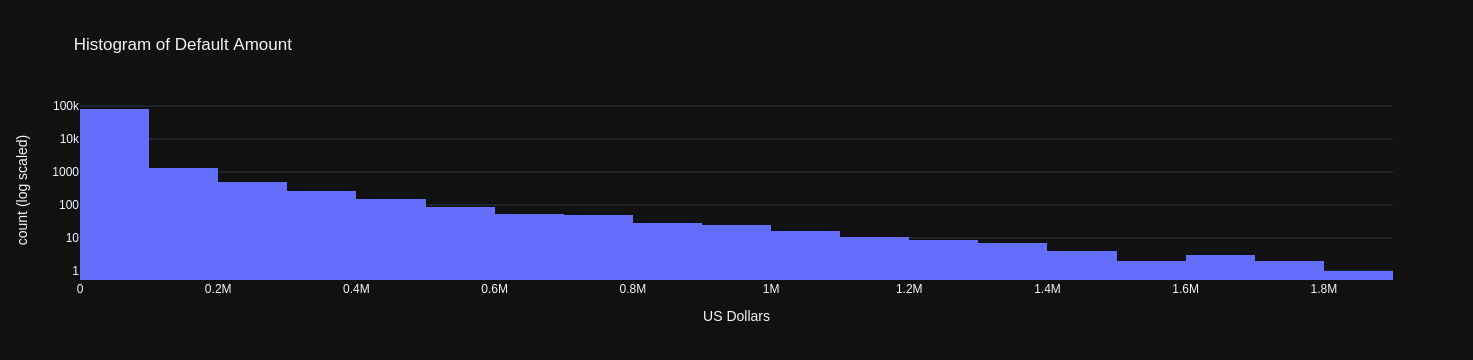

In [42]:
fig = px.histogram(df_train['default_amount'],
                   nbins=30,
                   log_y=True,
                   title='Histogram of Default Amount',
                   labels={'default_amount':'US Dollars'},
                   x='default_amount',
                   template='plotly_dark').update_layout(
    yaxis_title="count (log scaled)")
fig.show()

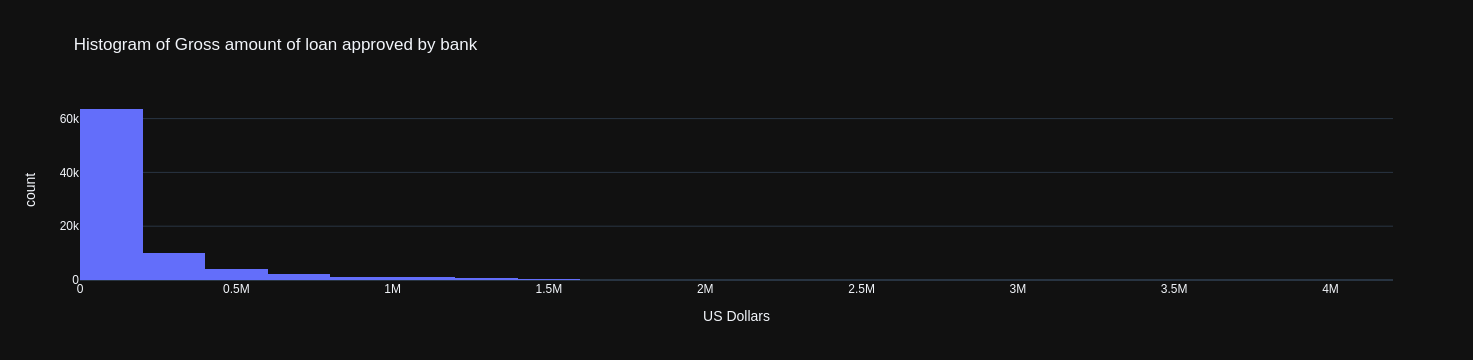

In [46]:
fig = px.histogram(df_train['GrAppv'],
                   nbins=30,
                   log_y=False,
                   title='Histogram of Gross amount of loan approved by bank',
                   labels={'GrAppv':'US Dollars'},
                   x='GrAppv',
                   template='plotly_dark')
fig.show()

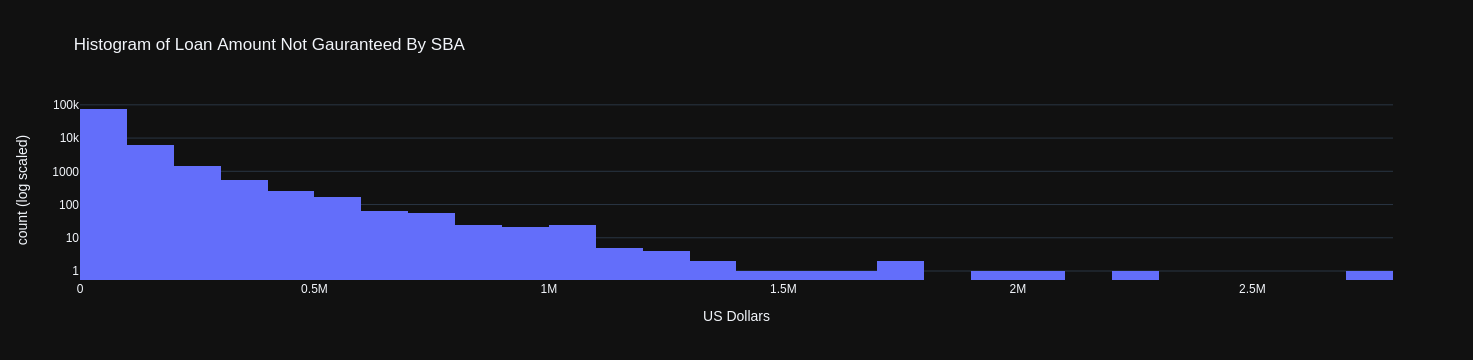

In [47]:
fig = px.histogram(df_train['insecure_amount'],
                   nbins=30,
                   log_y=True,
                   title='Histogram of Loan Amount Not Gauranteed By SBA',
                   labels={'insecure_amount':'US Dollars'},
                   x='insecure_amount',
                   template='plotly_dark').update_layout(
    yaxis_title="count (log scaled)")
fig.show()

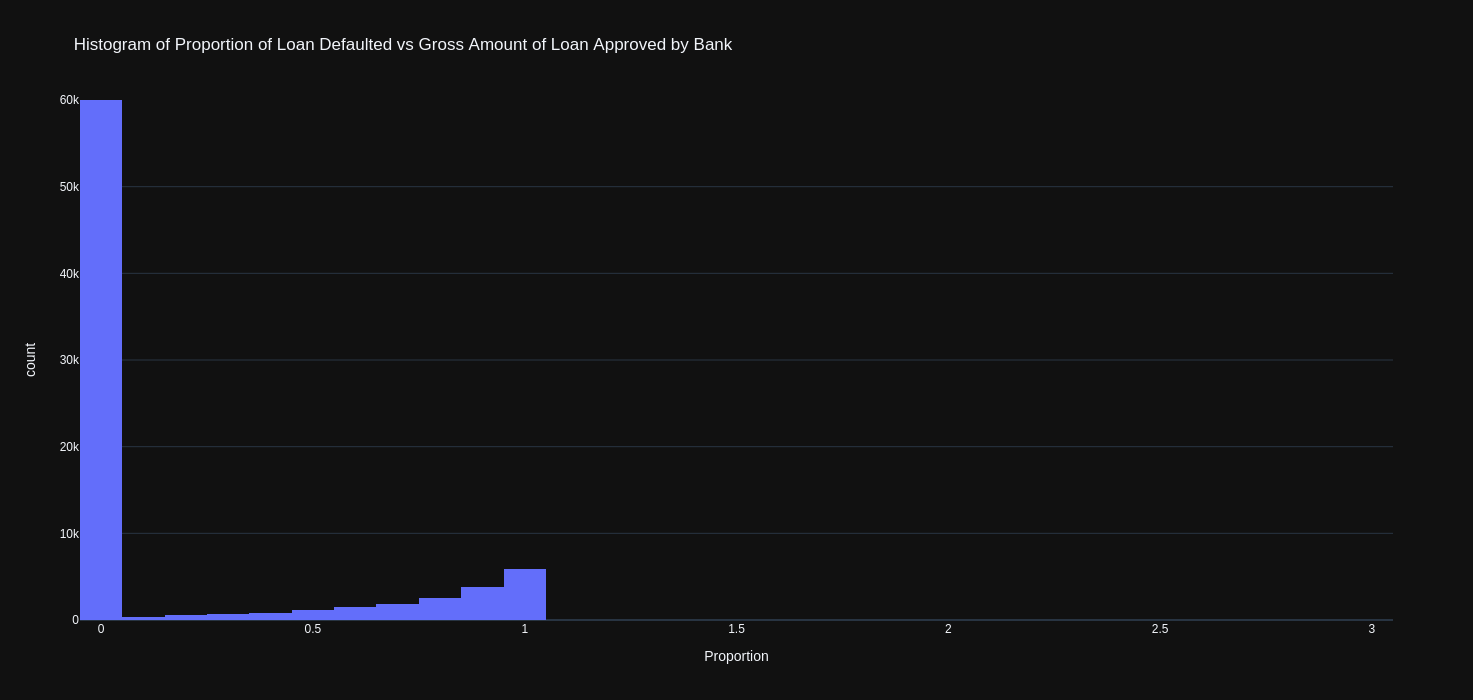

In [34]:
fig = px.histogram(df_train['default_proportion'],
                   height=700,
                   nbins=40,
                   title='Histogram of Proportion of Loan Defaulted vs Gross Amount of Loan Approved by Bank',
                   labels={'default_proportion':'Proportion'},
                   x='default_proportion',
                   template='plotly_dark')
fig.update_yaxes(range=[0, 60000])
fig.show()

In [19]:
import math

round?

Signature: round(number, ndigits=None)
Docstring:
Round a number to a given precision in decimal digits.

The return value is an integer if ndigits is omitted or None.  Otherwise
the return value has the same type as the number.  ndigits may be negative.
Type:      builtin_function_or_method


In [ ]:
fig = px.histogram(df_train['insecure_amount'],
                   nbins=30,
                   log_y=True,
                   title='Histogram of Loan Amount Not Gauranteed By SBA',
                   labels={'insecure_amount':'US Dollars'},
                   x='insecure_amount',
                   template='plotly_dark').update_layout(
    yaxis_title="count (log scaled)")
fig.show()